In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from statsmodels.graphics import tsaplots


In [32]:
df = pd.read_csv('/content/AMD.csv')
print(df)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-03-17    0.000000    3.302083    3.125000    3.145833    3.145833   
1      1980-03-18    0.000000    3.125000    2.937500    3.031250    3.031250   
2      1980-03-19    0.000000    3.083333    3.020833    3.041667    3.041667   
3      1980-03-20    0.000000    3.062500    3.010417    3.010417    3.010417   
4      1980-03-21    0.000000    3.020833    2.906250    2.916667    2.916667   
...           ...         ...         ...         ...         ...         ...   
11117  2024-04-22  148.149994  149.889999  145.630005  148.639999  148.639999   
11118  2024-04-23  151.649994  153.500000  150.350006  152.270004  152.270004   
11119  2024-04-24  156.559998  157.660004  150.630005  151.740005  151.740005   
11120  2024-04-25  149.149994  155.139999  146.750000  153.759995  153.759995   
11121  2024-04-26  154.119995  158.625000  153.425201  157.395004  157.395004   

         Volume  
0        

In [33]:
df1 = df['Adj Close']

Plot Prices

([<matplotlib.axis.XTick at 0x7f91850cd330>], [Text(11122.0, 0, 'off')])

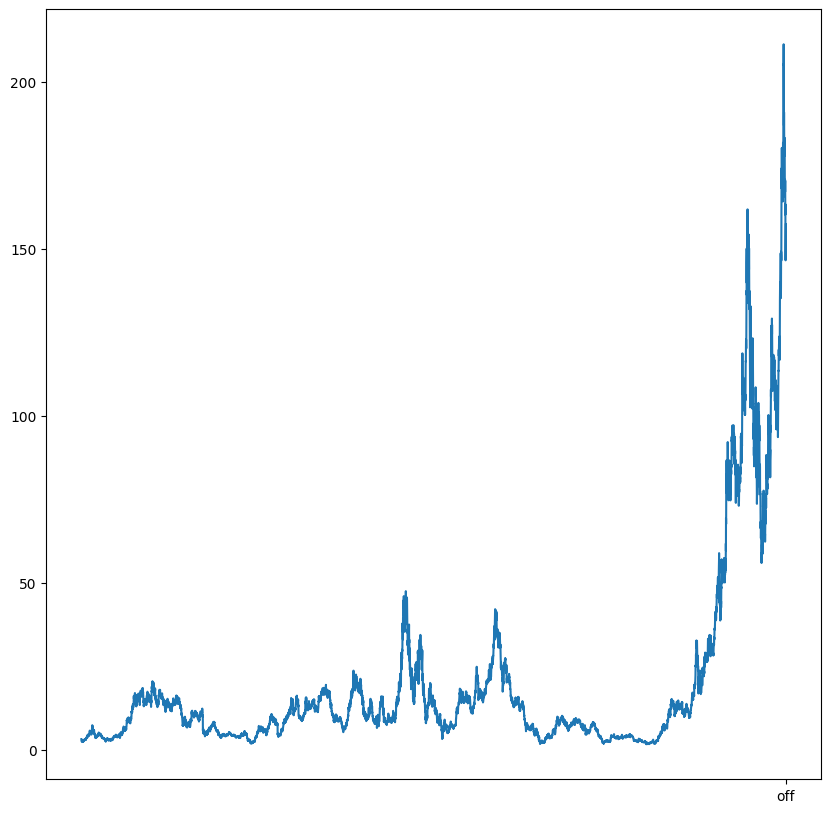

In [34]:
plt.figure(figsize=(10,10))
plt.plot(df['Date'],df['Adj Close'])
plt.xticks("off")

3. Plot log-returns for the given data

In [35]:
#log returns
#lr=log returns
lp=np.log(df1)
lr=lp.diff()
print(lr)

0             NaN
1       -0.037104
2        0.003431
3       -0.010327
4       -0.031637
           ...   
11117    0.013547
11118    0.024128
11119   -0.003487
11120    0.013224
11121    0.023366
Name: Adj Close, Length: 11122, dtype: float64


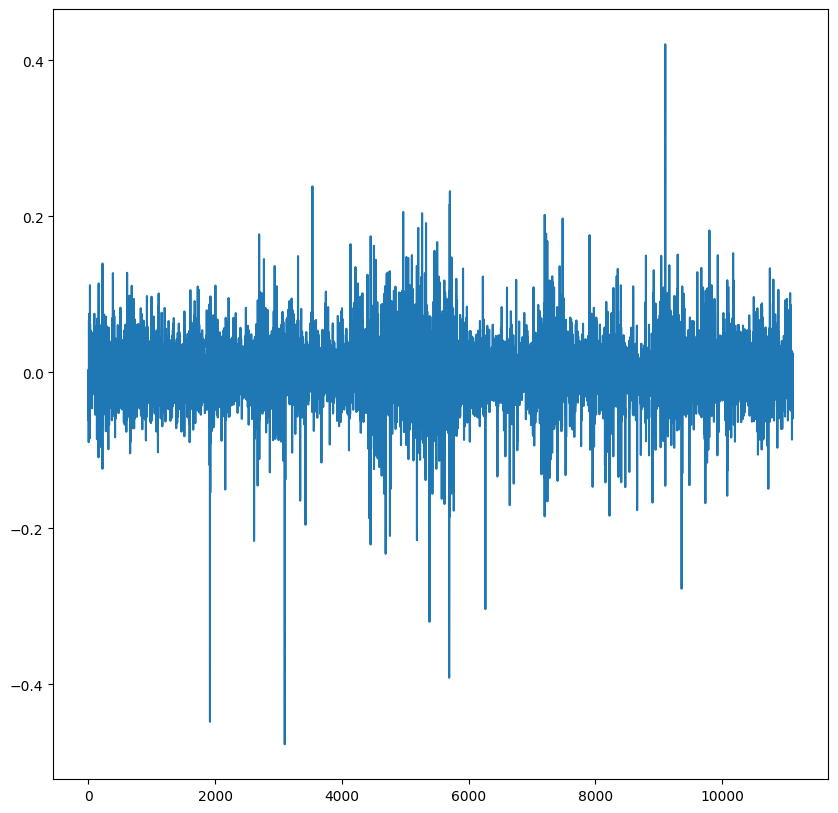

In [36]:
plt.plot(lr)

In [37]:
#Printing mean and sts dev of log returns
print('mean=%.3f stdv=%.3f' % (np.mean(lr), np.std(lr)))

mean=0.000 stdv=0.037


4. Check whether log-returns are normally distributed

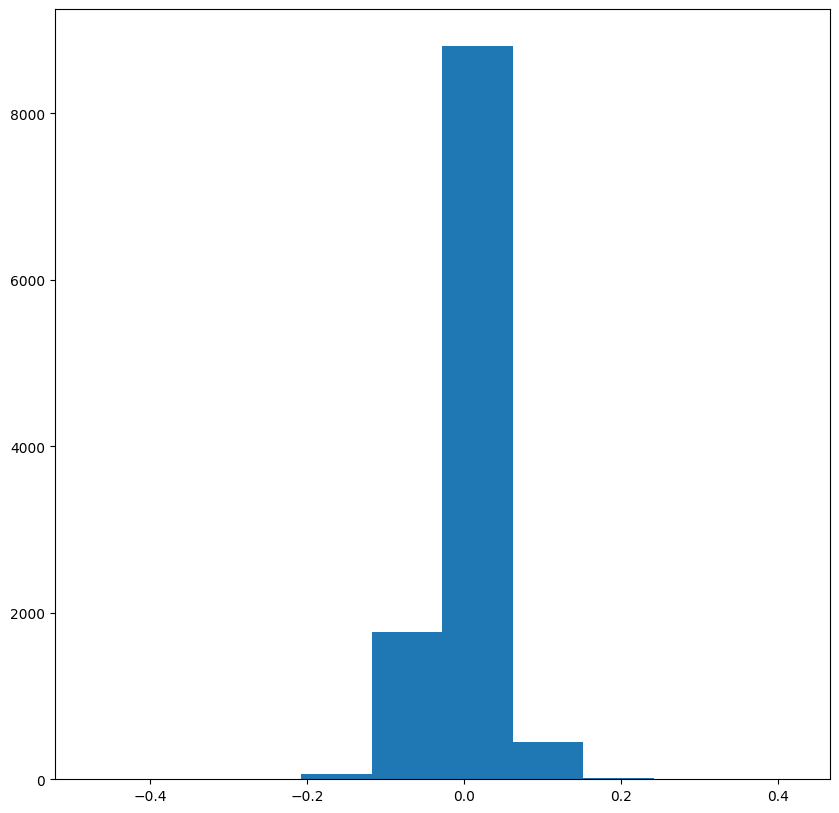

In [38]:
#histogram
plt.hist(lr)
plt.show()

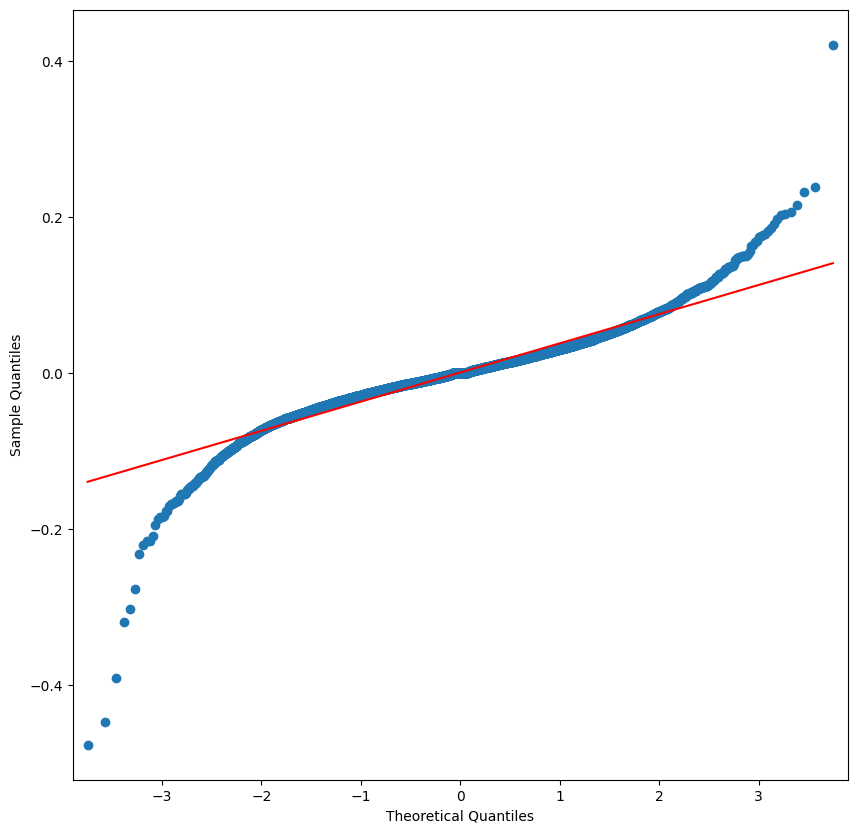

In [39]:
#QQ_PLOT
lr[0]=0
qqplot(lr, line='s')
plt.show()

Since the QQ plot is not straight and has significant deviation, the data is not normally distributed

In [40]:
# Perform the Jarque-Bera test
statistic, p_value = stats.jarque_bera(lr)

# Display the results
print('Jarque-Bera test statistic = %.4f, p-value = %.4f' % (statistic, p_value))

# Set the significance level
alpha = 0.05

# Check if the null hypothesis can be rejected
if p_value < alpha:
    print("The null hypothesis can be rejected; the data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected; the data is normally distributed.")


Jarque-Bera test statistic = 55388.8926, p-value = 0.0000
The null hypothesis can be rejected; the data is not normally distributed.


The obtained p-value falling below 0.05 leads to the rejection of the null hypothesis, indicating a departure from normal distribution characteristics. Notably, the data displays pronounced disparities in skewness and kurtosis, further reinforcing its departure from the expected normal distribution pattern.

In [41]:
#Kolmogorov-Smirnov test
stats.kstest(lr, 'norm')

KstestResult(statistic=0.4513235290484329, pvalue=0.0, statistic_location=-0.08900095307365907, statistic_sign=-1)

With a p-value below 0.05, it is determined that the log returns deviate from the characteristics expected in a normally distributed dataset.

In [42]:
#D’Agostino’s K-squared test

statistic, p_value = normaltest(lr)

# Output the test results
print('Normality Test Statistic: {:.3f}, p-value: {:.3f}'.format(statistic, p_value))

# Define the significance level
alpha = 0.05

# Check if the null hypothesis can be rejected
if p_value > alpha:
    print('The sample appears to be Gaussian (fail to reject H0).')
else:
    print('The sample does not appear to be Gaussian (reject H0).')


Normality Test Statistic: 2328.596, p-value: 0.000
The sample does not appear to be Gaussian (reject H0).


5. Volatility

In [43]:
#calculate volatility
volatility=lr.std()
volatility_annual = np.sqrt(252)*volatility
print(volatility_annual)
print(volatility)

0.5939206429156644
0.03741348380148675


6. Identify the risk free rate for the given currency

In [44]:
#Identify the risk free rate for the given currency and strike
df1 = df['Adj Close']
S0 = 157.395
print(S0)
strike = np.random.uniform(0.8,1.2)*S0
rfr = np.random.uniform(0.05,0.15)
print(strike)
print(rfr)

157.395
142.54084955681444
0.12804405465812385


7. Test the assumption if the log-returns are independent/uncorrelated

In [45]:
logr = pd.DataFrame(np.array(lr),columns=['log_ret'])
print(logr)

        log_ret
0      0.000000
1     -0.037104
2      0.003431
3     -0.010327
4     -0.031637
...         ...
11117  0.013547
11118  0.024128
11119 -0.003487
11120  0.013224
11121  0.023366

[11122 rows x 1 columns]


In [46]:
logr["lag_1"] = logr["log_ret"].shift(periods=1)
print(logr)

        log_ret     lag_1
0      0.000000       NaN
1     -0.037104  0.000000
2      0.003431 -0.037104
3     -0.010327  0.003431
4     -0.031637 -0.010327
...         ...       ...
11117  0.013547 -0.055961
11118  0.024128  0.013547
11119 -0.003487  0.024128
11120  0.013224 -0.003487
11121  0.023366  0.013224

[11122 rows x 2 columns]


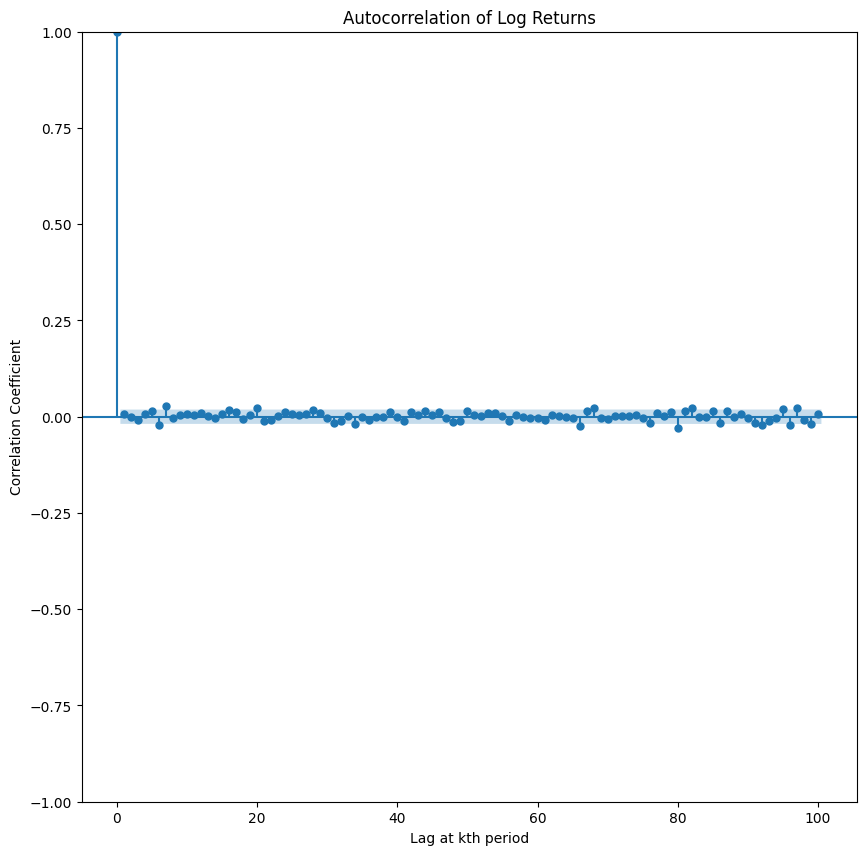

In [47]:
plt.rc("figure",figsize=(10,10))
fig = tsaplots.plot_acf(logr["log_ret"], lags=100)
plt.title("Autocorrelation of Log Returns")
plt.xlabel("Lag at kth period")
plt.ylabel("Correlation Coefficient")
plt.show()

The graphical analysis suggests a lack of correlation or independence among the log returns, underscored by the presence of a correlation coefficient consistently below 0.5.

8. Option price for an In-The-Money (ITM) European call option

In [48]:
#function to calculate combination
def nCr(n,r):
  f = math.factorial
  return f(n) / f(r) / f(n-r)
#Class to calculate option price using CRR model
#s0=initial equity price
#sigma=volatility
#rfr=risk free rate
#n=number
def european_call_itm_price(s0, sigma, strike, maturity, rfr, n, dyield = None):
    delta = float(maturity)/float(n)
    u = math.exp(sigma*math.sqrt(delta))
    d = 1/math.exp(sigma*math.sqrt(delta))
    if dyield == None:
      q = (math.exp(rfr*delta) - d) / (u - d)

    else:
      q = (math.exp((rfr-dyield)*delta) - d) / (u - d)
    prc = 0
    temp_stock = 0
    temp_payout = 0
    for x in range(0, n + 1):
      temp_stock = s0*((u)**(x))*((d)**(n - x))
      temp_payout = max(temp_stock - strike, 0)
      prc += nCr(n, x)*(q**(x))*((1-q)**(n - x))*temp_payout
    prc = prc / ((1+ rfr*delta )**n)
    #prc = prc / math.exp(rfr*delta)
    return prc
def european_put_itm_price(s0, sigma, strike, maturity, rfr, n, dyield=None):
    delta = float(maturity)/float(n)
    u = math.exp(sigma * math.sqrt(delta))
    d = 1 / math.exp(sigma * math.sqrt(delta))

    if dyield is None:
        q = (math.exp(rfr * delta) - d) / (u - d)
    else:
        q = (math.exp((rfr - dyield) * delta) - d) / (u - d)

    prc = 0
    temp_stock = 0
    temp_payout = 0
    for x in range(0, n + 1):
        temp_stock = s0 * ((u) ** (x)) * ((d) ** (n - x))
        temp_payout = max(strike - temp_stock, 0)
        prc += nCr(n, x) * (q ** (x)) * ((1 - q) ** (n - x)) * temp_payout

    prc = prc / ((1 + rfr * delta) ** n)

    return prc

In [49]:
cr = european_call_itm_price(S0, volatility_annual, strike, 36/365.0, rfr, 100)
pr = european_put_itm_price(S0, volatility_annual, strike, 36/365.0, rfr, 100)
print(cr)
print(pr)

21.338353352141244
4.695360212030228


9. Use CRR, Black-Scholes and Simulation Methods to compute the option
prices.

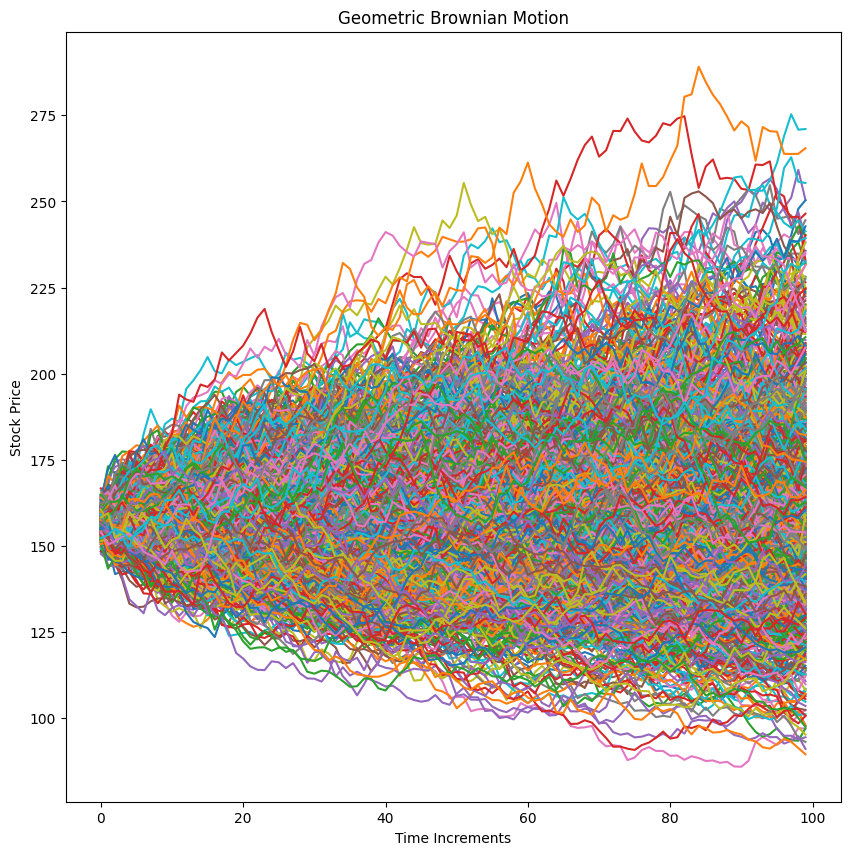

In [50]:
import numpy as np
import matplotlib.pyplot as plt
def GBM_paths(S, T, r, q, sigma, steps, N):
  """
  Inputs
  #S = Current stock Price
  #K = Strike Price
  #T = Time to maturity 1 year = 1, 1 months = 1/12
  #r = risk free interest rate
  #q = dividend yield
  # sigma = volatility
  Output
  # [steps,N] Matrix of asset paths
  """
  # S(t) = S(0)*exp(mu-sigm**2/2)+ sigma*B(t) GBM.
  dt = T/steps
  ST = np.log(S) + np.cumsum(((r - q - sigma**2/2)*dt +\
  sigma*np.sqrt(dt) * \
  np.random.normal(size=(steps,N))),axis=0)
  return np.exp(ST)


S = 157.395 # stock price S_{0}
K = strike # strike
T = 36/365.0 # time to maturity
r = rfr # risk free risk in annual %
q = 0 # annual dividend rate = N/A
sigma = volatility_annual # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials
paths = GBM_paths(S,T,r,q,sigma,steps,N)
plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")
plt.show()

In [51]:
#Simulated option price for call
payoffs = np.maximum(paths[-1]-K, 0)
option_price_call = np.mean(payoffs)*np.exp(-r*T)
#Simulated option price for put
payoffs_put = np.maximum(K - paths[-1], 0)
option_price_put = np.mean(payoffs_put) * np.exp(-r * T)

print(f"Simulated price for call is {option_price_call}")
print(f"Simulated price for put is {option_price_put}")

Simulated price for call is 22.889341758056332
Simulated price for put is 4.0667149246221275


In [52]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price
call_price = black_scholes(S, K, T, r, sigma, option_type='call')
put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print("Call option price:", call_price)
print("Put option price:", put_price)


Call option price: 21.321100999005054
Put option price: 4.6781211298670655



**`Call Option Analysis:`**

* Simulated Price: 22.889341758056332
* Black-Scholes Estimate: 21.321100999005054
* Cox-Ross-Rubinstein Model Price: 21.338353352141244

**`Put Option Analysis:`**

* Simulated Price: 4.0667149246221275
* Black-Scholes Estimate: 4.6781211298670655
* Cox-Ross-Rubinstein Model Price: 4.695360212030228

10. Use some other method to estimate the volatility parameter
other than the historical volatility

In [53]:
!pip install mibian

In [54]:
import mibian
ans=mibian.BS([157.395, strike, rfr,36],call_price)
ans.impliedVolatility

Hence, the implied volatility for the call option is 62.83%

Here we have estimated the volatility parameter using Black Scholes Model

In [55]:
!pip install arch
from arch import arch_model

In [56]:
def estimate_volatility_garch(returns, horizon=1):

    returns_rescaled = returns * 10
    model = arch_model(returns_rescaled, mean='Zero', vol='GARCH', p=1, q=1, rescale=False)
    results = model.fit(disp='off')
    forecasts = results.forecast(horizon=horizon)
    volatility_forecast = forecasts.variance.iloc[-1]
    volatility_forecast_percent = volatility_forecast * 100

    return volatility_forecast_percent



In [57]:
print(estimate_volatility_garch(lr))

h.1    10.839096
Name: 11121, dtype: float64


In [58]:
def estimate_volatility_heston(params, initial_price, time_to_expiry, num_paths=10000, num_steps=100):

    # Unpack Heston parameters
    kappa, theta, sigma, rho, v0 = params

    # Initialize arrays to store simulated prices and volatilities
    simulated_prices = np.zeros((num_paths, num_steps + 1))
    simulated_volatilities = np.zeros((num_paths, num_steps + 1))

    # Set initial values
    simulated_prices[:, 0] = initial_price
    simulated_volatilities[:, 0] = v0

    # Generate correlated Brownian motions
    dw1 = np.random.normal(size=(num_paths, num_steps))
    dw2 = rho * dw1 + np.sqrt(1 - rho**2) * np.random.normal(size=(num_paths, num_steps))

    # Simulate paths
    for i in range(num_steps):
        dt = time_to_expiry / num_steps
        vol = simulated_volatilities[:, i]
        price = simulated_prices[:, i]

        # Euler scheme for volatility
        simulated_volatilities[:, i+1] = (vol + kappa * (theta - vol) * dt + sigma * np.sqrt(np.abs(vol) * dt) * dw2[:, i])

        # Euler scheme for asset price
        simulated_prices[:, i+1] = price * np.exp(-0.5 * vol * dt + np.sqrt(np.abs(vol) * dt) * dw1[:, i])

    # Calculate log returns
    log_returns = np.log(simulated_prices[:, 1:] / simulated_prices[:, :-1])

    # Calculate volatility as the standard deviation of log returns
    volatility_forecast = np.std(log_returns) * np.sqrt(252)  # Annualize volatility

    return volatility_forecast

heston_params = (1.0, 0.05, 0.1, -0.5, 0.05)

volatility = estimate_volatility_heston(heston_params, 3.145833, 36)
print("Volatility forecast:", volatility)


Volatility forecast: 2.134047572070793
